# **Data in Design, AI for Urban Data and Visualization**

#### Data, Design Computation, Artificial Intelligence, Visualization, Harvard GSD J Term 2023


**KEYWORD:**
Vector, Raster, Urban Data, GIS, Data Processing, Data Mining, Machine Learning, Artificial Intelligence, Visualization, Mapping, Design Decision-Making

-----

#### Instructor : NJ Namju Lee / nj.namju@gmail.com  
###### * Linkedin - https://www.linkedin.com/in/nj-namju-lee-926b3252/    * Git - https://github.com/NamjuLee  

###### * Web - http://www.njstudio.co.kr                                  * Lab - http://www.njslab.com/NJSLabCore/  

###### * Video(English) - https://www.youtube.com/c/njnamjulee            * Writing(English) - https://medium.com/@nj-namju  

###### * Video(Korean) - https://www.youtube.com/c/CodeforDesign          * Writing(Korean) - https://brunch.co.kr/@njnamju  
-----

This material was developed with Jung Min Han

---

PART 02 Programming Data Processing

# LAB 06 Pandas & Numpy Example: Imputing missing values

In [51]:
# import library
import numpy as np
import pandas as pd
import os

In [52]:
def GetPandasFromExcel(path, fileName):
    path = os.path.join(path , fileName)
    return pd.read_excel(path) # pip install openpyxl needed

In [53]:
theDir = 'data/'
fn1 =  'dailyElectricityWithFeatures.xlsx'
d1 = GetPandasFromExcel(theDir, fn1)
print(d1.head(2))

  Unnamed: 0  electricity-kWh   startDay     endDay       RH-%       T-C  \
0 2012-01-01      2800.244977 2012-01-01 2012-01-02  76.652174  7.173913   
1 2012-01-02      3168.974047 2012-01-02 2012-01-03  55.958333  5.833333   

     Tdew-C  pressure-mbar  solarRadiation-W/m2  windDirection  windSpeed-m/s  \
0  3.073913    1004.956522            95.260870     236.086957       4.118361   
1 -2.937500     994.625000            87.333333     253.750000       5.914357   

   humidityRatio-kg/kg  coolingDegrees  heatingDegrees  dehumidification  \
0             0.004796             0.0        7.826087               0.0   
1             0.003415             0.0        9.166667               0.0   

   occupancy  
0        0.0  
1        0.3  


c:\Users\namju\miniconda3\envs\tf-gpu-2022\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [54]:
def InsertNoneByRandom(data, percent): # 0.7
    # percent = 1.0 - percent
    newDF = data.copy(deep=True)
    dataLength = len(data)
    rndIndex  = np.random.choice(dataLength,int(dataLength * percent) )
    newDF.iloc[rndIndex] = np.nan # 'null'
    print ("The total length of old data:", dataLength)
    print ("The total length of new data:", newDF.count() )
    print ("the length of None in the new data:", newDF.isnull().sum(),"(",percent,"%)")
    return newDF

In [55]:
trainData = InsertNoneByRandom(d1, 0.3)

The total length of old data: 1483
The total length of new data: Unnamed: 0             1097
electricity-kWh        1097
startDay               1097
endDay                 1097
RH-%                   1097
T-C                    1097
Tdew-C                 1097
pressure-mbar          1097
solarRadiation-W/m2    1097
windDirection          1097
windSpeed-m/s          1097
humidityRatio-kg/kg    1097
coolingDegrees         1097
heatingDegrees         1097
dehumidification       1097
occupancy              1097
dtype: int64
the length of None in the new data: Unnamed: 0             386
electricity-kWh        386
startDay               386
endDay                 386
RH-%                   386
T-C                    386
Tdew-C                 386
pressure-mbar          386
solarRadiation-W/m2    386
windDirection          386
windSpeed-m/s          386
humidityRatio-kg/kg    386
coolingDegrees         386
heatingDegrees         386
dehumidification       386
occupancy              386
dtype:

In [56]:
print (trainData.head(10))

  Unnamed: 0  electricity-kWh   startDay     endDay       RH-%       T-C  \
0 2012-01-01      2800.244977 2012-01-01 2012-01-02  76.652174  7.173913   
1 2012-01-02      3168.974047 2012-01-02 2012-01-03  55.958333  5.833333   
2 2012-01-03      5194.533376 2012-01-03 2012-01-04  42.500000 -3.208333   
3 2012-01-04      5354.861935 2012-01-04 2012-01-05  41.541667 -7.083333   
4 2012-01-05      5496.223993 2012-01-05 2012-01-06  46.916667 -0.583333   
5 2012-01-06      5414.499703 2012-01-06 2012-01-07  65.958333  1.625000   
6 2012-01-07      4138.989708 2012-01-07 2012-01-08  65.166667  6.491667   
7        NaT              NaN        NaT        NaT        NaN       NaN   
8        NaT              NaN        NaT        NaT        NaN       NaN   
9 2012-01-10      5370.202795 2012-01-10 2012-01-11  62.541667  3.458333   

      Tdew-C  pressure-mbar  solarRadiation-W/m2  windDirection  \
0   3.073913    1004.956522            95.260870     236.086957   
1  -2.937500     994.625000  

In [57]:
fn1 =  'dailyElectricityWithFeatures.xlsx'
trainData.to_csv("data/" + fn1[:-5] + "_train." + "csv", header=True)

Predict missing values

In [58]:
# import library
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
# statistical function
def MSE_MeanSquaredErrorLoss(fullData,targetData ): # common use 
    sum = RSS_ResidualSumofSquares(fullData,targetData)
    return sum / len(fullData)

def MSE_MeanSquaredErrorLossForCategorical(fullData,targetData ): # Categorical
    sum = 0.0
    for i in range(len(fullData)):
        if(fullData[i] != targetData[i]): sum +=1
    return sum / len(fullData)

def GetMean(dataArray):
    return np.mean(dataArray)
#     theSum=0.0
#     for d in dataArray: theSum += d
#     return theSum/len(dataArray)
def GetMedian(dataArray):
    return np.median(dataArray)

def RSS_ResidualSumofSquares(dataFull, missingFill): # residual standard error, RSE ??? -- OLS (Ordinary Least Squares) Residual Sum of Squares(RSS)
    sumSoFar=0.0
    for i in range(len(missingFill)):
        sumSoFar += (dataFull[i]-missingFill[i])**2
    return sumSoFar

def TSS_TotalSumOfSquare(fullData,targetData):
    # meanVal = targetData.mean()# for numpy
    meanVal = GetMean(targetData)# manual
    sumSoFar= 0.0
    for i in range(len(targetData)):
        # sumSoFar += (fullData.y[i]-meanVal)**2
        sumSoFar += (fullData[i]-meanVal)**2
    return sumSoFar

def R_Squared_CoefficientOfDetermination(fullData, targetData): # this is for regression 
    RSS = RSS_ResidualSumofSquares(fullData, targetData)
    TSS = TSS_TotalSumOfSquare(fullData, targetData)
    return 1-(RSS/TSS)
def R_Squared_CoefficientOfDeterminationBySKLearn(fullData, targetData):
    return sk.metrics.r2_score(fullData, targetData)

In [60]:
# utility function
def DeepCopy(d):
    return d.copy(deep=True)
def GetPandasFromCsv(path, fileName):
    path = os.path.join(path , fileName)
    return pd.read_csv(path)

### Load data

In [61]:
theDir = 'data/'

fn2 =  'dailyElectricityWithFeatures'

dTrain = GetPandasFromCsv(theDir, fn2 + "_train.csv")
dTest = GetPandasFromCsv(theDir, fn2 + "_test.csv")

# dTrain = InsertNoneByRandom(dTrain, 0.3)

index =  dTrain.columns.values
dTrain.rename(columns={index[0]:"time"},inplace=True)
dTest.rename(columns={index[0]:"time"},inplace=True)

print( dTrain.head(2))
print (dTest.head(2))

   time  Unnamed: 0  electricity-kWh    startDay      endDay       RH-%  \
0     0  2012-01-01      2800.244977  2012-01-01  2012-01-02  76.652174   
1     1  2012-01-02      3168.974047  2012-01-02  2012-01-03  55.958333   

        T-C    Tdew-C  pressure-mbar  solarRadiation-W/m2  windDirection  \
0  7.173913  3.073913    1004.956522            95.260870     236.086957   
1  5.833333 -2.937500     994.625000            87.333333     253.750000   

   windSpeed-m/s  humidityRatio-kg/kg  coolingDegrees  heatingDegrees  \
0       4.118361             0.004796             0.0        7.826087   
1       5.914357             0.003415             0.0        9.166667   

   dehumidification  occupancy  
0               0.0        0.0  
1               0.0        0.3  
   time  Unnamed: 0  electricity-kWh    startDay      endDay       RH-%  \
0     0  2012-01-01      2800.244977  2012-01-01  2012-01-02  76.652174   
1     1  2012-01-02      3168.974047  2012-01-02  2012-01-03  55.958333   



Data exploration

In [62]:
# print null values
def GetCountForNullFromPandas(d):
    return d.isnull().sum()

colTest = dTest['electricity-kWh']
colTrain = dTrain['electricity-kWh']
 
x = dTest.index.values

print (x)
print (colTest.shape)
print (GetCountForNullFromPandas(colTest))
print( "----------------")
print( colTrain.shape)
print (GetCountForNullFromPandas(colTrain))

[   0    1    2 ... 1480 1481 1482]
(1483,)
0
----------------
(1483,)
386


In [63]:
colTest

0       2800.244977
1       3168.974047
2       5194.533376
3       5354.861935
4       5496.223993
           ...     
1478    4112.517452
1479    3040.412167
1480    2785.975068
1481    4109.728509
1482    4066.366329
Name: electricity-kWh, Length: 1483, dtype: float64

In [64]:
colTest.describe()

count    1483.000000
mean     5081.858935
std      1155.051478
min      2223.362065
25%      4246.928294
50%      5092.179797
75%      6011.419225
max      7870.142990
Name: electricity-kWh, dtype: float64

In [65]:
def VisScatterPlot(d):
    x = range(len(d))
    y = d
    plt.figure(figsize=(20,10))
    plt.scatter(x, y, color="red", alpha=0.5 )
    plt.title("data exploration")
    plt.xlabel('time')
    plt.ylabel('electricity-kWh')
    plt.tight_layout()
    plt.show()

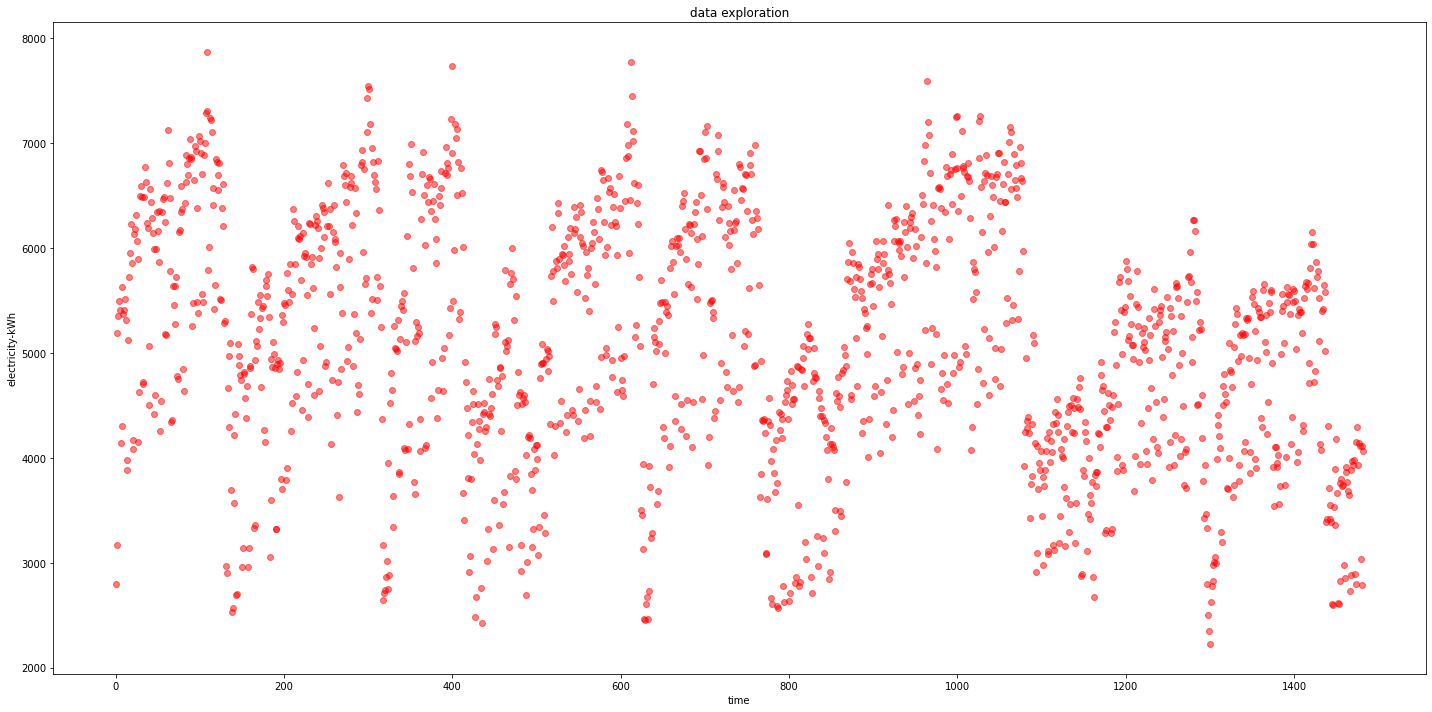

In [66]:
VisScatterPlot(colTest)

In [67]:
# copy for each algorithm
colTrainByMean = DeepCopy(colTrain)
colTrainByMedian = DeepCopy(colTrain)
colTrainByKNN = DeepCopy(colTrain)
colTrainByReg = DeepCopy(colTrain)

Overview:  filling by mean 

In [68]:
# clearn data by removing null data
print (colTrain[:10])

dfnull = colTrain[colTrain.isnull()]
dfnull_index = dfnull.index.values

dfnotnull = colTrain[colTrain.notnull()]
dfnotnull_index = dfnotnull.index.values

print (dfnotnull_index)
print (dfnull[:10])
print (dfnotnull[:10])

0    2800.244977
1    3168.974047
2    5194.533376
3    5354.861935
4    5496.223993
5    5414.499703
6    4138.989708
7            NaN
8            NaN
9    5370.202795
Name: electricity-kWh, dtype: float64
[   0    1    2 ... 1480 1481 1482]
7    NaN
8    NaN
12   NaN
13   NaN
14   NaN
16   NaN
17   NaN
19   NaN
20   NaN
24   NaN
Name: electricity-kWh, dtype: float64
0     2800.244977
1     3168.974047
2     5194.533376
3     5354.861935
4     5496.223993
5     5414.499703
6     4138.989708
9     5370.202795
10    5411.600996
11    5518.026707
Name: electricity-kWh, dtype: float64


C:\Users\namju\AppData\Local\Temp\ipykernel_20792\1415628749.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print (dfnull[:10])
C:\Users\namju\AppData\Local\Temp\ipykernel_20792\1415628749.py:12: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print (dfnotnull[:10])


In [69]:
# prepare for the test value 
temp = dfnull.index.values
my_test =colTest[temp]
print( my_test[:10])

7     4301.957494
8     5626.493403
12    5313.596132
13    3881.154390
14    3975.859691
16    5722.366925
17    5952.708590
19    5862.304000
20    4167.754841
24    6313.664206
Name: electricity-kWh, dtype: float64


C:\Users\namju\AppData\Local\Temp\ipykernel_20792\3569395372.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print( my_test[:10])


In [70]:
mean = GetMean(dfnotnull.tolist())
print (mean)

5095.999830643012


In [71]:
mean = dfnotnull.mean()

In [72]:
colTrainByMean[colTrainByMean.isnull()] = mean
print (colTrainByMean[:10])

0    2800.244977
1    3168.974047
2    5194.533376
3    5354.861935
4    5496.223993
5    5414.499703
6    4138.989708
7    5095.999831
8    5095.999831
9    5370.202795
Name: electricity-kWh, dtype: float64


Loss Function or Cost Function

In [73]:
print ("R Square Error:", R_Squared_CoefficientOfDetermination(colTrainByMean,colTest))

R Square Error: 0.6526255701940177


In [74]:
print ("Mean Squared Error :", MSE_MeanSquaredErrorLoss(colTrainByMean,colTest ))

Mean Squared Error : 343834.5653665404


Filling by mean

In [75]:
def fillByMean(dataFrame):
    dfnull = dataFrame[dataFrame.isnull()]
    dfnull_index = dfnull.index.values
    dfnotnull = dataFrame[dataFrame.notnull()]
    dfnotnull_index = dfnotnull.index.values
    mean = GetMean(dfnotnull.tolist())
    print( "the mean of the data :", mean)
    dataFrame[dataFrame.isnull()] = mean
    return dataFrame

In [76]:
colTrainByMean = DeepCopy(colTrain)
colTrainByMean = fillByMean(colTrainByMean)
RSquareMean = R_Squared_CoefficientOfDetermination(colTrainByMean,colTest)
print ("R Square :", RSquareMean)


the mean of the data : 5095.999830643012
R Square : 0.6526255701940177


Filling by median

In [77]:
def fillByMedian(dataFrame):
    dfnull = dataFrame[dataFrame.isnull()]
    dfnull_index = dfnull.index.values
    dfnotnull = dataFrame[dataFrame.notnull()]
    dfnotnull_index = dfnotnull.index.values
    median = GetMedian(dfnotnull.tolist())
    print( "the median of the data :", median)
    dataFrame[dataFrame.isnull()] = median
    return dataFrame

In [78]:
colTrainByMedian = DeepCopy(colTrain)
colTrainByMedian = fillByMedian(colTrainByMedian)
RSquareMedian = R_Squared_CoefficientOfDetermination(colTrainByMedian,colTest)
print( "R Square :", RSquareMedian)


the median of the data : 5102.08595331199
R Square : 0.6524610470484511


KNN (k-nearest neighbors algorithm) 
https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

In [79]:
import numpy as np
import pandas as pd
import random
import sklearn as sk
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as Lin_Reg
from statsmodels.regression.linear_model import OLS
import time
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
def fillByKNN(dataFrame, k):
    dfnull = dataFrame[dataFrame.isnull()]
    dfnull_index = dfnull.index
    dfnull_index = dfnull_index.values.reshape((dfnull_index.shape[0], 1))
    dfnotnull = dataFrame[dataFrame.notnull()]
    dfnotnull_index = dfnotnull.index
    #preparing data in array form
    dfnotnull_index = dfnotnull_index.values.reshape((dfnotnull_index.shape[0], 1))
    #set data for KNN
    x_train = dfnotnull_index
    x_test = dfnull_index
    y_train = dfnotnull.tolist()
    y_test = dfnull.tolist()
    #fit model, predict and evaluate
    neighbours = KNN(n_neighbors=k)
    neighbours.fit(x_train, y_train)
    y_pred = neighbours.predict(x_test)
    r = neighbours.score(x_test, my_test)
    return y_pred, r

In [81]:
colTrain = dTrain['electricity-kWh']

colTrainByKNN = DeepCopy(colTrain)
k = 3
colTrainByKNN, r = fillByKNN(colTrainByKNN, k)

print (len(colTrainByKNN))
print ('R^2 value of KNN fit, for k=', k, ', ', r)

386
R^2 value of KNN fit, for k= 3 ,  0.5871005786668488


In [82]:
colTrainByKNN = DeepCopy(colTrain)
rSquare = []
theMax = -100000
theMaxK = 0
for k in range(1,20):
    temp, r = fillByKNN(colTrainByKNN, k)
    print ('R^2 value of KNN fit, for k=', k , ', ', r)
    rSquare.append(r)
    if theMax < r:
        theMax = r
        theMaxK = k
print( "---------------------------")
print ("the max K :", theMaxK , ", R:", theMax)

R^2 value of KNN fit, for k= 1 ,  0.5219676577402972
R^2 value of KNN fit, for k= 2 ,  0.6723152422570114
R^2 value of KNN fit, for k= 3 ,  0.5871005786668488
R^2 value of KNN fit, for k= 4 ,  0.5253773559873025
R^2 value of KNN fit, for k= 5 ,  0.47535757871805573
R^2 value of KNN fit, for k= 6 ,  0.45473671335230814
R^2 value of KNN fit, for k= 7 ,  0.4515405272257281
R^2 value of KNN fit, for k= 8 ,  0.4641416121021005
R^2 value of KNN fit, for k= 9 ,  0.5022025304304998
R^2 value of KNN fit, for k= 10 ,  0.5305095867374028
R^2 value of KNN fit, for k= 11 ,  0.5473880250944623
R^2 value of KNN fit, for k= 12 ,  0.5427637805287423
R^2 value of KNN fit, for k= 13 ,  0.5333078181037301
R^2 value of KNN fit, for k= 14 ,  0.5124520959794165
R^2 value of KNN fit, for k= 15 ,  0.4975273848869409
R^2 value of KNN fit, for k= 16 ,  0.48794987901405384
R^2 value of KNN fit, for k= 17 ,  0.47488710175392823
R^2 value of KNN fit, for k= 18 ,  0.4722338999801097
R^2 value of KNN fit, for k= 19 ,

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


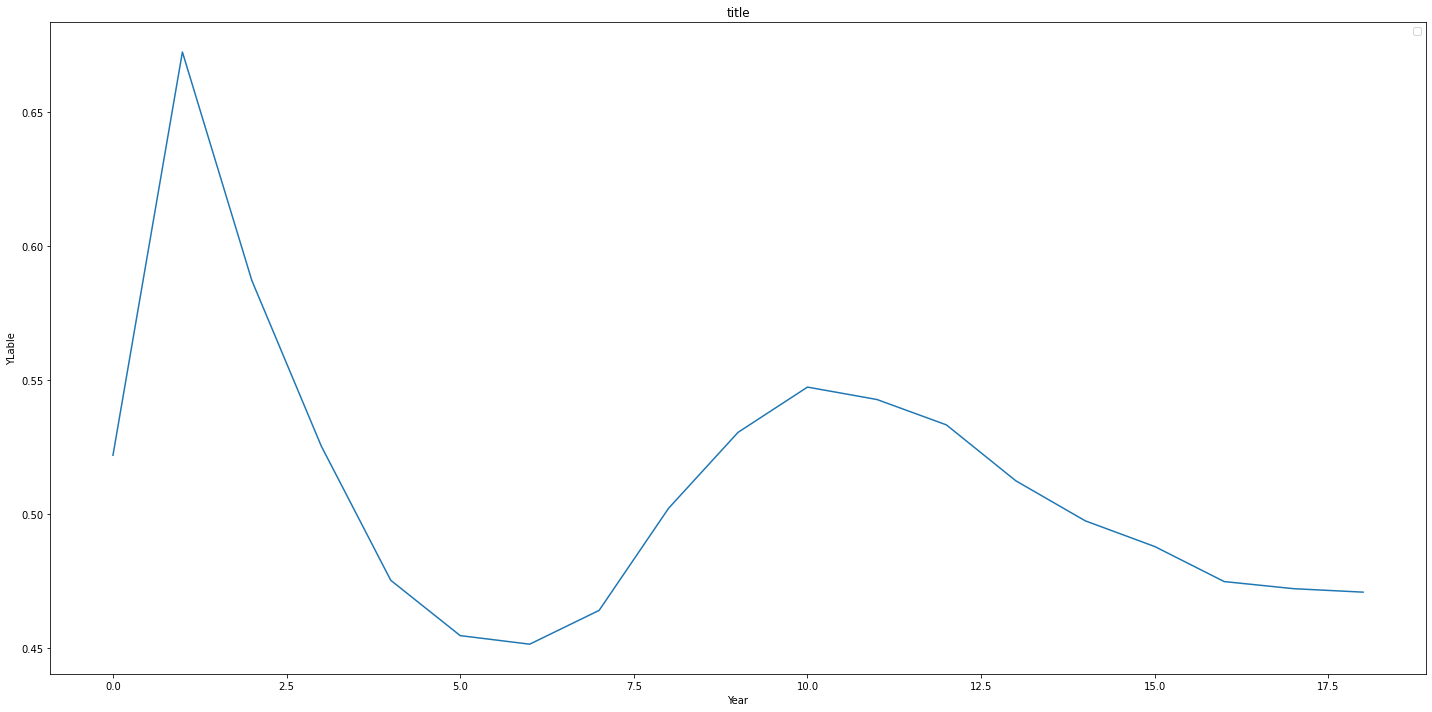

<module 'matplotlib.pyplot' from 'c:\\Users\\namju\\miniconda3\\envs\\tf-gpu-2022\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [83]:
def VisSquarePlot(xData, title = 'title', YLable="YLable" , path=""):
    plt.figure(figsize=(20,10))
    yTime = range(len(xData))
    plt.plot(yTime,xData)
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel(YLable)
    plt.legend(loc='best')
#     plt.axhline(13, color='r', label=r'True $\beta_1$')
#     plt.axhline(20, color='r', label=r'True $\beta_1$')
#     plt.axhspan(13, 20, facecolor='0.5', alpha=0.5,label=r'True $\beta_1$')
    if path != "":
        plt.savefig(path)
    plt.tight_layout()
    plt.show()
    return plt
VisSquarePlot(rSquare)

Linear regression

https://en.wikipedia.org/wiki/Linear_regression

In [84]:
def fillByLinReg(dataFrame):
    dfnull = dataFrame[dataFrame.isnull()]
    dfnull_index = dfnull.index
    dfnull_index = dfnull_index.values.reshape((dfnull_index.shape[0], 1))
    dfnotnull = dataFrame[dataFrame.notnull()]
    dfnotnull_index = dfnotnull.index
    #preparing data in array form
    dfnotnull_index = dfnotnull_index.values.reshape((dfnotnull_index.shape[0], 1))
    #set data for KNN
    x_train = dfnotnull_index
    x_test = dfnull_index
    y_train = dfnotnull.tolist()
    y_test = dfnull.tolist()
    #####
    regression = Lin_Reg()
    
    regression.fit(x_train, y_train)
    
    predicted_y = regression.predict(x_test)
    ####
    r = regression.score(x_test, my_test)
    
    plt.figure(figsize=(20,10))
    plt.scatter(x_train, y_train, color='red')
    plt.plot(x_test, regression.predict(x_test), color='blue',linewidth=1)
    plt.tight_layout()
    plt.show()
    return predicted_y, r

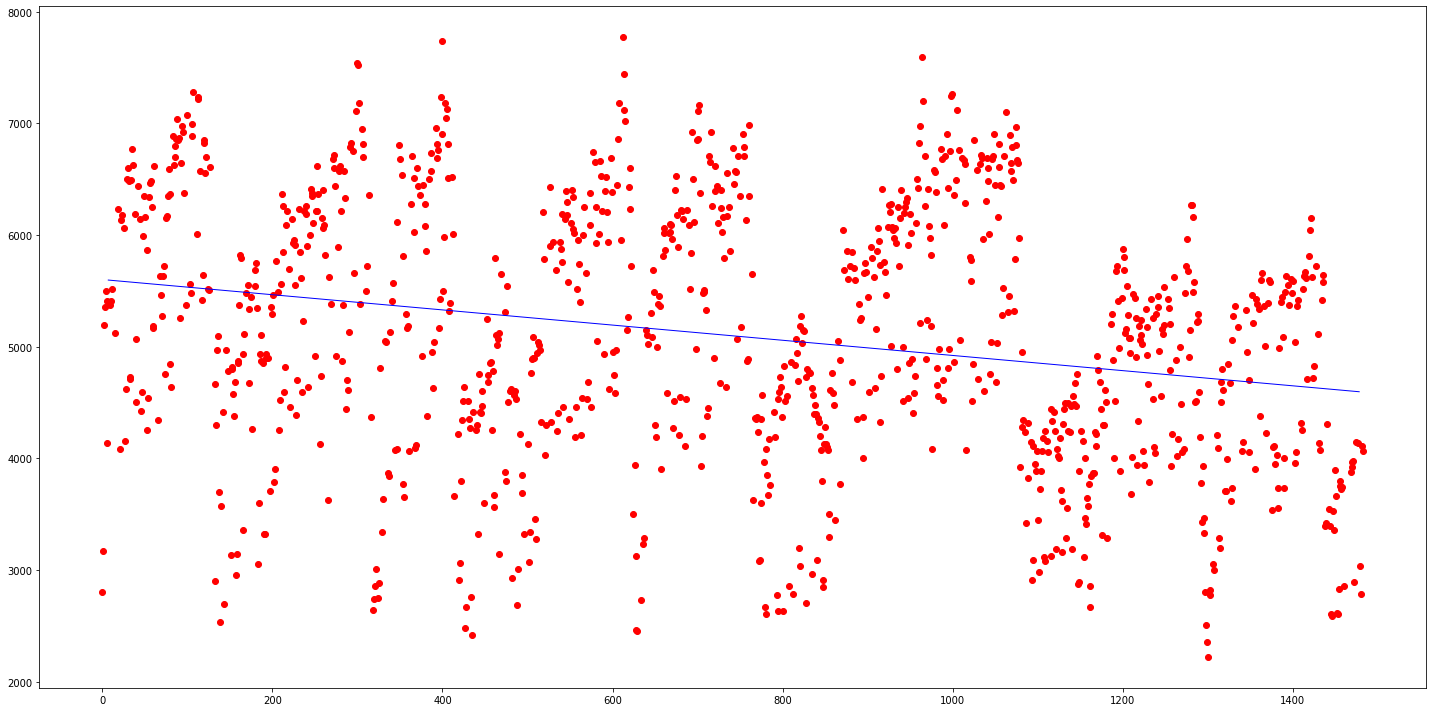

R^2 value = 0.05764294526041347


In [85]:
colTrainByReg = DeepCopy(colTrain)
s, rReg = fillByLinReg(colTrainByReg)
print ('R^2 value =',rReg)

Polynomial regression

https://en.wikipedia.org/wiki/Linear_regression

In [86]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
def fillByPolynomial(dataFrame):
    dfnull = dataFrame[dataFrame.isnull()]
    dfnull_index = dfnull.index
    dfnull_index = dfnull_index.values.reshape((dfnull_index.shape[0], 1))
    dfnotnull = dataFrame[dataFrame.notnull()]
    dfnotnull_index = dfnotnull.index
    #preparing data in array form
    dfnotnull_index = dfnotnull_index.values.reshape((dfnotnull_index.shape[0], 1))
    #set data for KNN
    x_train = dfnotnull_index
    x_test = dfnull_index
    y_train = dfnotnull.tolist()
    y_test = dfnull.tolist()

    x_plot = np.linspace(0, len(x_train))
    y = y_train
    X = x_train
    lw = 2
    
    colors = ['teal', 'yellowgreen', 'gold', 'red', 'blue']
    plt.figure(figsize=(20,10))
    plt.scatter(X, y, color='navy', s=30, marker='o', label="training points")
    maxR = 0
    
    for count, degree in enumerate([1,2,4,8]):
        model = make_pipeline(PolynomialFeatures(degree), Ridge())
        model.fit(X, y)
        y_plot = model.predict(X)
        plt.plot(X, y_plot, color=colors[count], linewidth=lw, label="degree %d" % degree)
        r = model.score(x_test, my_test)
        if maxR < r:
            maxR = r
        print ("degree:", degree, ", R:", r)
    plt.legend(loc='lower left')
    plt.tight_layout()
    plt.show()
    return maxR


degree: 1 , R: 0.05764294530166003
degree: 2 , R: 0.04979081442785627
degree: 4 , R: 0.06325122245175119
degree: 8 , R: 0.11469018324339453


c:\Users\namju\miniconda3\envs\tf-gpu-2022\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.8094e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\namju\miniconda3\envs\tf-gpu-2022\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.9108e-53): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


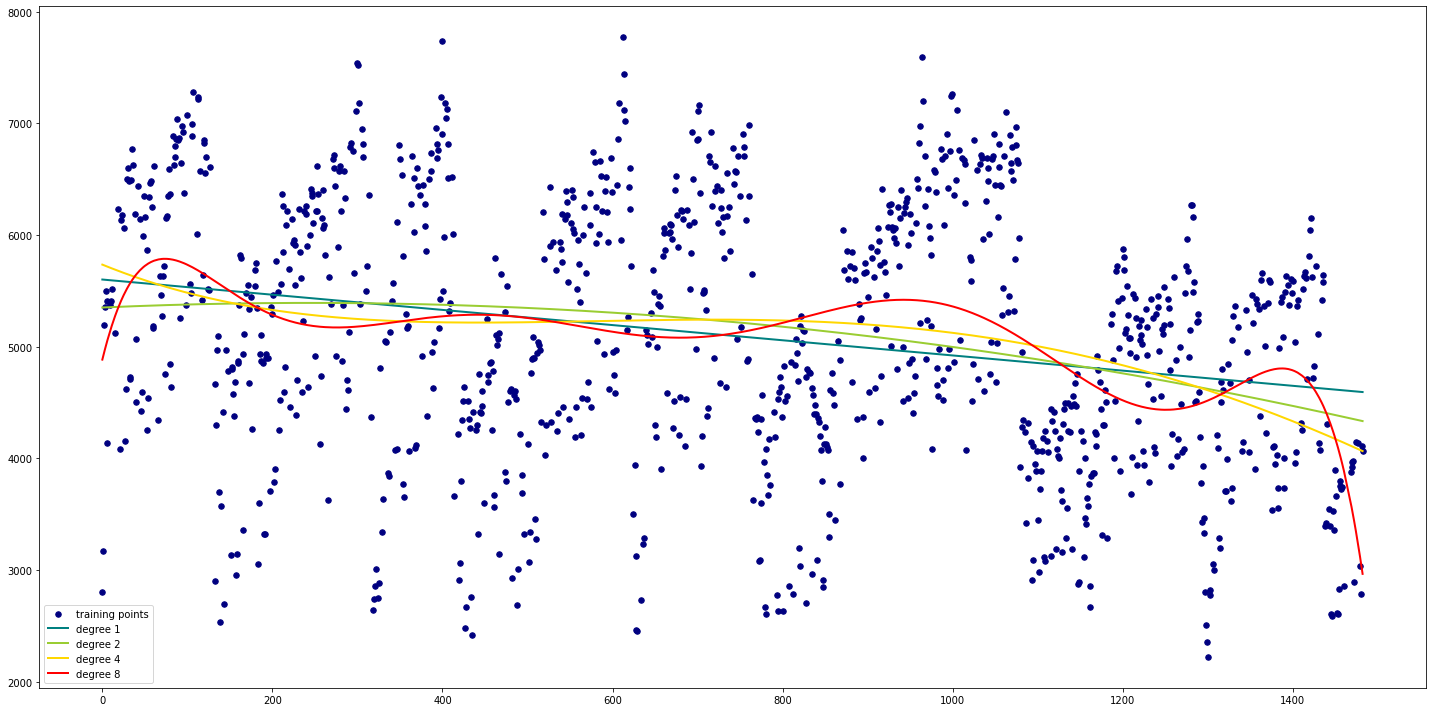

In [87]:
colTrainByPoly = DeepCopy(colTrain)
rPoly = fillByPolynomial(colTrainByPoly)

Support Vector Regression (SVR) using linear and non-linear kernels

http://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py

In [88]:
from sklearn.svm import SVR
def SupportVectorRegression(dataFrame):
    dfnull = dataFrame[dataFrame.isnull()]
    dfnull_index = dfnull.index
    dfnull_index = dfnull_index.values.reshape((dfnull_index.shape[0], 1))
    dfnotnull = dataFrame[dataFrame.notnull()]
    dfnotnull_index = dfnotnull.index
    #preparing data in array form
    dfnotnull_index = dfnotnull_index.values.reshape((dfnotnull_index.shape[0], 1))
    #set data for KNN
    x_train = dfnotnull_index
    x_test = dfnull_index
    y_train = dfnotnull.tolist()
    y_test = dfnull.tolist()

    y = y_train
    X = x_train

    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.9)
#     svr_lin = SVR(kernel='linear', C=1e3)
#     svr_poly = SVR(kernel='poly', C=1e3, degree=2)
    y_rbf = svr_rbf.fit(X, y).predict(X)
#     y_lin = svr_lin.fit(X, y).predict(X)
#     y_poly = svr_poly.fit(X, y).predict(X)

    rSqure = 0
    svr_rbfR = svr_rbf.score(x_test, my_test)
#     if rSqure < svr_rbfR:
#         rSqure = svr_rbfR
    print( "SupportVectorRegression R (Kernel:rbf):", svr_rbfR)
#     svr_linR = svr_lin.score(x_test, my_test)
#     if rSqure < svr_linR:
#         rSqure = svr_linR
#     print "SupportVectorRegression R (Kernel:linear):", svr_linR
#     svr_polyR = svr_poly.score(x_test, my_test)
#     print "SupportVectorRegression R (Kernel:poly):", svr_polyR
    
    lw = 2
    plt.figure(figsize=(20,10))
    plt.scatter(X, y, color='darkorange', label='data')
    # plt.hold('on')
    plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
#     plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
#     plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
    plt.xlabel('data')
    plt.ylabel('target')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.tight_layout()
    plt.show()
    return svr_rbfR

SupportVectorRegression R (Kernel:rbf): 0.45805591598516937


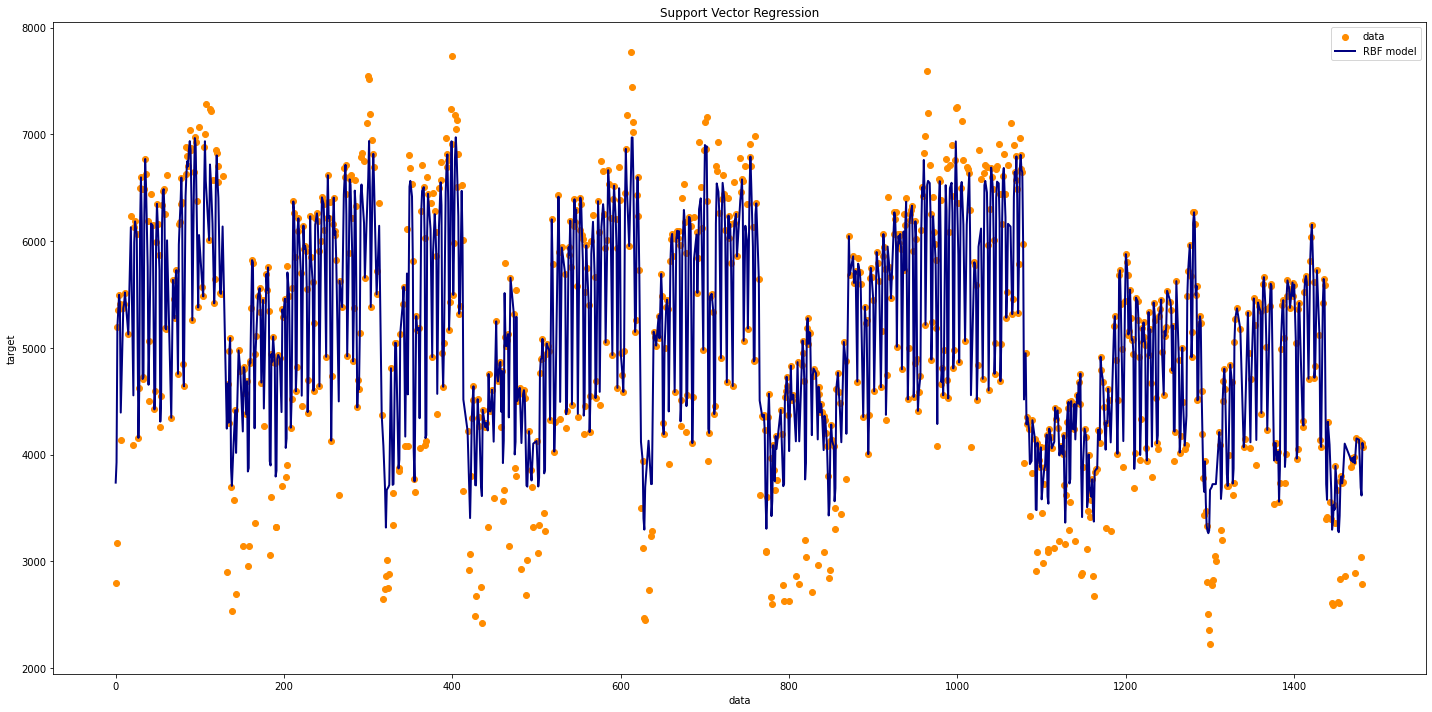

In [89]:
colTrainBySVR = DeepCopy(colTrain)
rSVR = SupportVectorRegression(colTrainBySVR)

### result 

In [90]:
# create dic for save the R Square
dailyElectricityWithFeatures = {}
dailyElectricityWithFeatures["mean"] = RSquareMean
dailyElectricityWithFeatures["median"] = RSquareMedian
dailyElectricityWithFeatures["knn"] = theMax
dailyElectricityWithFeatures["rReg"] = rReg
dailyElectricityWithFeatures['rPoly'] = rPoly
dailyElectricityWithFeatures['rSVR'] = rSVR
print (dailyElectricityWithFeatures)

{'mean': 0.6526255701940177, 'median': 0.6524610470484511, 'knn': 0.6723152422570114, 'rReg': 0.05764294526041347, 'rPoly': 0.11469018324339453, 'rSVR': 0.45805591598516937}
